# https://medium.com/@kaantopcu/pythagorean-expectation-in-sports-analytics-in-nba-60061a842d03

In [63]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
NBA = pd.read_csv("C:/Users/USER/Desktop/AI_CLASS/coursera/NBA_Games.csv")

NBA

,CITY,TEAM_NAME,TEAM_ID,GAME_ID,NICKNAME,STATE,YEAR_FOUNDED,SEASON_ID,TEAM_ABBREVIATION,GAME_DATE,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home,not paired
0,Oklahoma City,Oklahoma City Thunder,1.610613e+09,1.130000e+07,Thunder,Oklahoma,1967.0,12013.0,OKC,10/5/2013,...,34.0,52.0,22.0,9.0,8.0,20.0,26.0,13.0,A,999.0
1,Chicago,Chicago Bulls,1.610613e+09,1.130000e+07,Bulls,Illinois,1966.0,12013.0,CHI,10/5/2013,...,39.0,56.0,20.0,5.0,10.0,23.0,25.0,6.0,A,0.0
2,Indiana,Indiana Pacers,1.610613e+09,1.130000e+07,Pacers,Indiana,1976.0,12013.0,IND,10/5/2013,...,27.0,38.0,15.0,12.0,8.0,15.0,23.0,-6.0,H,0.0
3,New Orleans,New Orleans Pelicans,1.610613e+09,1.130000e+07,Pelicans,Louisiana,2002.0,12013.0,NOP,10/5/2013,...,21.0,33.0,17.0,12.0,4.0,15.0,32.0,1.0,A,0.0
4,Houston,Houston Rockets,1.610613e+09,1.130000e+07,Rockets,Texas,1967.0,12013.0,HOU,10/5/2013,...,30.0,35.0,24.0,9.0,4.0,22.0,27.0,-1.0,H,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18411,Memphis,Memphis Grizzlies,1.610613e+09,1.621900e+09,Grizzlies,Tennessee,1995.0,22019.0,MEM,7/3/2019,...,36.0,47.0,19.0,8.0,5.0,14.0,19.0,13.0,H,0.0
18412,San Antonio,San Antonio Spurs,1.610613e+09,1.621900e+09,Spurs,Texas,1976.0,22019.0,SAS,7/3/2019,...,29.0,38.0,12.0,5.0,3.0,11.0,14.0,-7.2,A,0.0
18413,Utah,Utah Jazz,1.610613e+09,1.621900e+09,Jazz,Utah,1974.0,22019.0,UTA,7/3/2019,...,31.0,44.0,15.0,6.0,5.0,15.0,25.0,5.8,H,0.0
18414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
NBAR17 = NBA.loc[NBA.SEASON_ID == 22017] #數字表示為2019年常規賽(2)
NBAR17.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired
count,2.559000e+03,2.559000e+03,2559.000000,2559.0,2559.000000,2559.000000,2472.000000,2559.000000,2559.000000,2559.000000,...,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000,2559.000000
mean,1.610613e+09,1.267025e+08,1969.698710,22017.0,238.663931,104.728019,104.616505,38.928878,85.090270,0.458000,...,9.709652,33.414224,43.123877,22.652208,7.747948,4.810864,13.740524,20.023056,0.001641,33.963658
std,8.734105e+00,3.809147e+08,16.700727,0.0,12.212719,13.197583,13.224342,5.621118,7.743447,0.056437,...,3.624976,5.489521,6.462369,5.608008,2.925210,2.510685,3.758218,4.377587,13.660807,181.077269
min,1.610613e+09,2.170000e+07,1946.000000,22017.0,198.000000,53.000000,53.000000,16.000000,55.000000,0.219000,...,0.000000,18.000000,22.000000,5.000000,0.000000,0.000000,3.000000,8.000000,-61.000000,0.000000
25%,1.610613e+09,2.170033e+07,1949.000000,22017.0,239.000000,96.000000,96.000000,35.000000,80.000000,0.420000,...,7.000000,30.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,-9.000000,0.000000
50%,1.610613e+09,2.170066e+07,1970.000000,22017.0,240.000000,105.000000,105.000000,39.000000,85.000000,0.458000,...,9.000000,33.000000,43.000000,23.000000,8.000000,5.000000,14.000000,20.000000,0.000000,0.000000
75%,1.610613e+09,2.170099e+07,1980.000000,22017.0,241.000000,114.000000,114.000000,43.000000,90.000000,0.494000,...,12.000000,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.000000
max,1.610613e+09,1.621700e+09,2002.000000,22017.0,317.000000,149.000000,149.000000,58.000000,114.000000,0.667000,...,23.000000,56.000000,68.000000,46.000000,17.000000,16.000000,29.000000,42.000000,61.000000,999.000000


In [47]:
print(NBAR17.columns.tolist())

['CITY', 'TEAM_NAME', 'TEAM_ID', 'GAME_ID', 'NICKNAME', 'STATE', 'YEAR_FOUNDED', 'SEASON_ID', 'TEAM_ABBREVIATION', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'PTSAGN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'home', 'not paired']


In [48]:
print("checked missing data(NAN mount):",NBAR17.isnull().sum()) #PTSAGN有87筆缺失值

checked missing data(NAN mount): CITY                  0
TEAM_NAME             0
TEAM_ID               0
GAME_ID               0
NICKNAME              0
STATE                 0
YEAR_FOUNDED          0
SEASON_ID             0
TEAM_ABBREVIATION     0
GAME_DATE             0
MATCHUP               0
WL                    0
MIN                   0
PTS                   0
PTSAGN               87
FGM                   0
FGA                   0
FG_PCT                0
FG3M                  0
FG3A                  0
FG3_PCT               0
FTM                   0
FTA                   0
FT_PCT                0
OREB                  0
DREB                  0
REB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PLUS_MINUS            0
home                  0
not paired            0
dtype: int64


In [49]:
NBAR17 = NBAR17.dropna()
NBAR17.describe()
# 資料數從2559減少到2472

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired
count,2.472000e+03,2.472000e+03,2472.000000,2472.0,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.0
mean,1.610613e+09,1.273640e+08,1969.692557,22017.0,238.682848,104.616505,104.616505,38.900081,85.023463,0.458005,...,9.680016,33.442961,43.122977,22.606392,7.722896,4.781149,13.747573,19.954288,0.007362,0.0
std,8.746416e+00,3.819694e+08,16.692670,0.0,12.299601,13.224342,13.224342,5.635075,7.760390,0.056436,...,3.628538,5.482467,6.460559,5.608646,2.918229,2.509601,3.761640,4.354665,13.683741,0.0
min,1.610613e+09,2.170000e+07,1946.000000,22017.0,198.000000,53.000000,53.000000,16.000000,55.000000,0.219000,...,0.000000,18.000000,22.000000,5.000000,0.000000,0.000000,3.000000,8.000000,-61.000000,0.0
25%,1.610613e+09,2.170033e+07,1949.000000,22017.0,239.000000,96.000000,96.000000,35.000000,80.000000,0.420000,...,7.000000,30.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,-9.000000,0.0
50%,1.610613e+09,2.170066e+07,1970.000000,22017.0,240.000000,105.000000,105.000000,39.000000,85.000000,0.458000,...,9.000000,33.000000,43.000000,22.000000,8.000000,5.000000,14.000000,20.000000,0.000000,0.0
75%,1.610613e+09,2.170099e+07,1980.000000,22017.0,241.000000,114.000000,114.000000,43.000000,90.000000,0.494000,...,12.000000,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.0
max,1.610613e+09,1.621700e+09,2002.000000,22017.0,317.000000,149.000000,149.000000,58.000000,114.000000,0.667000,...,23.000000,56.000000,68.000000,46.000000,17.000000,16.000000,29.000000,42.000000,61.000000,0.0


In [50]:
NBAR17.loc[:,['result']] = np.where(NBAR17.loc[:,['WL']]== 'W',1,0)
NBAR17.describe()

,TEAM_ID,GAME_ID,YEAR_FOUNDED,SEASON_ID,MIN,PTS,PTSAGN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,not paired,result
count,2.472000e+03,2.472000e+03,2472.000000,2472.0,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,...,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.0,2472.000000
mean,1.610613e+09,1.273640e+08,1969.692557,22017.0,238.682848,104.616505,104.616505,38.900081,85.023463,0.458005,...,33.442961,43.122977,22.606392,7.722896,4.781149,13.747573,19.954288,0.007362,0.0,0.500000
std,8.746416e+00,3.819694e+08,16.692670,0.0,12.299601,13.224342,13.224342,5.635075,7.760390,0.056436,...,5.482467,6.460559,5.608646,2.918229,2.509601,3.761640,4.354665,13.683741,0.0,0.500101
min,1.610613e+09,2.170000e+07,1946.000000,22017.0,198.000000,53.000000,53.000000,16.000000,55.000000,0.219000,...,18.000000,22.000000,5.000000,0.000000,0.000000,3.000000,8.000000,-61.000000,0.0,0.000000
25%,1.610613e+09,2.170033e+07,1949.000000,22017.0,239.000000,96.000000,96.000000,35.000000,80.000000,0.420000,...,30.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000,-9.000000,0.0,0.000000
50%,1.610613e+09,2.170066e+07,1970.000000,22017.0,240.000000,105.000000,105.000000,39.000000,85.000000,0.458000,...,33.000000,43.000000,22.000000,8.000000,5.000000,14.000000,20.000000,0.000000,0.0,0.500000
75%,1.610613e+09,2.170099e+07,1980.000000,22017.0,241.000000,114.000000,114.000000,43.000000,90.000000,0.494000,...,37.000000,47.000000,26.000000,10.000000,6.000000,16.000000,23.000000,9.000000,0.0,1.000000
max,1.610613e+09,1.621700e+09,2002.000000,22017.0,317.000000,149.000000,149.000000,58.000000,114.000000,0.667000,...,56.000000,68.000000,46.000000,17.000000,16.000000,29.000000,42.000000,61.000000,0.0,1.000000


In [51]:
NBAteams17 = NBAR17.groupby('TEAM_NAME')[["result","PTS", "PTSAGN"]].sum().reset_index()
NBAteams17

,TEAM_NAME,result,PTS,PTSAGN
0,Atlanta Hawks,27,8683.0,9101.0
1,Boston Celtics,59,8932.0,8629.0
2,Brooklyn Nets,31,8964.0,9226.0
3,Charlotte Hornets,38,9088.0,9057.0
4,Chicago Bulls,29,8619.0,9201.0
5,Cleveland Cavaliers,53,9300.0,9171.0
6,Dallas Mavericks,33,9051.0,9203.0
7,Denver Nuggets,47,9170.0,9084.0
8,Detroit Pistons,41,8754.0,8732.0
9,Golden State Warriors,56,9191.0,8770.0


In [56]:
# Pythagorean (Expected) Winning Percentage Formula=(Points Scored)16.5/[Points Scored)16.5 + (Points Allowed)16.5)]
# wpc: Winning_Percent / pyth: Pythagorean_Exp
NBAteams17['wpc'] = NBAteams17['result']/82 # 總共82場
NBAteams17['pyth'] = NBAteams17['PTS']**2/(NBAteams17['PTS']**2 + NBAteams17['PTSAGN']**2)
NBAteams17

,TEAM_NAME,result,PTS,PTSAGN,wpc,pyth
0,Atlanta Hawks,27,8683.0,9101.0,0.329268,0.476509
1,Boston Celtics,59,8932.0,8629.0,0.719512,0.517249
2,Brooklyn Nets,31,8964.0,9226.0,0.378049,0.485599
3,Charlotte Hornets,38,9088.0,9057.0,0.463415,0.501708
4,Chicago Bulls,29,8619.0,9201.0,0.353659,0.467375
5,Cleveland Cavaliers,53,9300.0,9171.0,0.646341,0.506984
6,Dallas Mavericks,33,9051.0,9203.0,0.402439,0.491674
7,Denver Nuggets,47,9170.0,9084.0,0.573171,0.504711
8,Detroit Pistons,41,8754.0,8732.0,0.500000,0.501258
9,Golden State Warriors,56,9191.0,8770.0,0.682927,0.523427


In [57]:
NBAteams17.sort_values(by="pyth", ascending=False)

,TEAM_NAME,result,PTS,PTSAGN,wpc,pyth
10,Houston Rockets,65,9245.0,8556.0,0.792683,0.538648
26,Toronto Raptors,62,9394.0,8720.0,0.756098,0.537157
9,Golden State Warriors,56,9191.0,8770.0,0.682927,0.523427
27,Utah Jazz,49,8665.0,8332.0,0.597561,0.519584
21,Philadelphia 76ers,52,9516.0,9191.0,0.634146,0.517368
1,Boston Celtics,59,8932.0,8629.0,0.719512,0.517249
19,Oklahoma City Thunder,47,8903.0,8681.0,0.573171,0.512623
25,San Antonio Spurs,49,8773.0,8557.0,0.597561,0.512462
23,Portland Trail Blazers,51,8906.0,8716.0,0.621951,0.510781
16,Minnesota Timberwolves,46,8895.0,8751.0,0.560976,0.508160


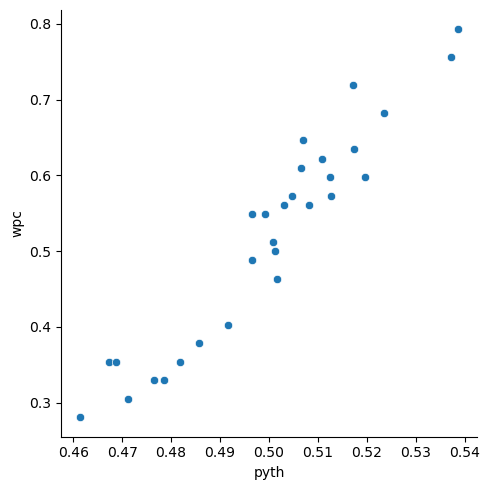

In [58]:
# 看相關性 (散狀圖)

sns.relplot(x="pyth", y="wpc", data = NBAteams17)

In [67]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth', data=NBAteams17).fit()
pyth_lm.summary()
# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     293.8
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           4.89e-16
Time:                        21:08:12   Log-Likelihood:                 51.851
No. Observations:                  29   AIC:                            -99.70
Df Residuals:                      27   BIC:                            -96.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9032      0.200    -14.527      0.000      -3.313      -2.493
pyth           6.8470      0.399     17.141      0.000       6.027       7.667
==============================================================================
Omnibus:                        1.540   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.463   Jarque-Bera (JB):                1.196
Skew:                           0.278   Prob(JB):                        0.550
Kurtosis:                       2.175   Cond. No.                         64.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""